# Rishik Reddy Bandi
# B4
# 220968300

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
from sklearn.preprocessing import MinMaxScaler

In [76]:
df=pd.read_csv("breast_cancer.csv")
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [77]:
df.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [78]:
df.rename(columns = {'1000025':'ID', '5':'Clump_thickness','1':'Uniformity_Cell_Size','1.1':'Uniformity_Cell_Shape','1.2':'Marginal_Adhesion','2':'Single_Epithelial_Cell_Size','1.3':'Bare_Nuclei','3':'Bland_Chromatin','1.4':'Normal_Nucleoli','1.5':'Mitoses','2.1':'Class'}, inplace = True)

In [79]:
df.columns

Index(['ID', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [80]:
df

,ID,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [81]:
df=df.drop(['ID'], axis=1)
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


In [82]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [83]:
def remove_non_numeric(i):
    if(i=='?'):
        return 0
    else:
        return i
df["Bare_Nuclei"]=df["Bare_Nuclei"].apply(remove_non_numeric)
df["Bare_Nuclei"]=df["Bare_Nuclei"].astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              698 non-null    int64
 1   Uniformity_Cell_Size         698 non-null    int64
 2   Uniformity_Cell_Shape        698 non-null    int64
 3   Marginal_Adhesion            698 non-null    int64
 4   Single_Epithelial_Cell_Size  698 non-null    int64
 5   Bare_Nuclei                  698 non-null    int32
 6   Bland_Chromatin              698 non-null    int64
 7   Normal_Nucleoli              698 non-null    int64
 8   Mitoses                      698 non-null    int64
 9   Class                        698 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 51.9 KB


In [85]:
df.dropna(inplace=True)
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

<Axes: ylabel='Count'>

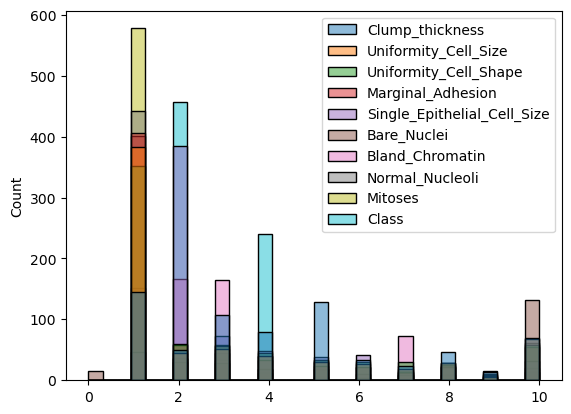

In [86]:
sns.histplot(data=df)

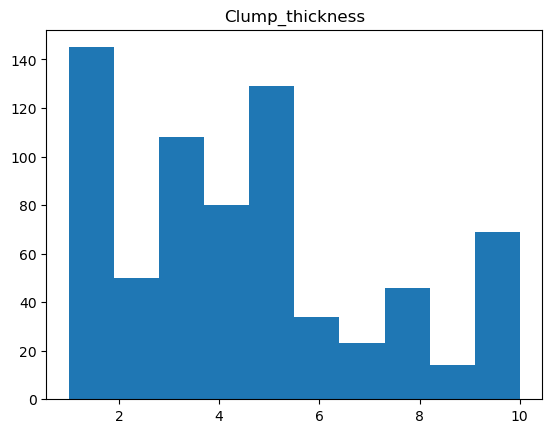

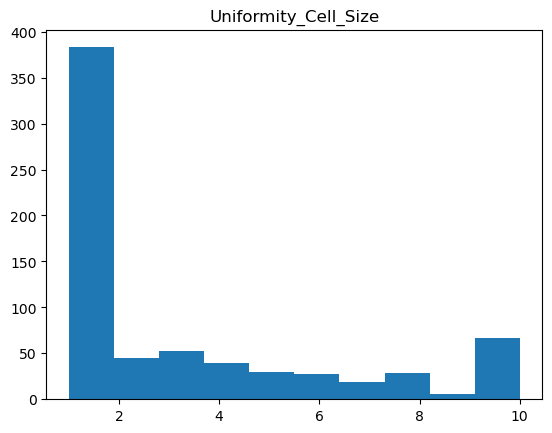

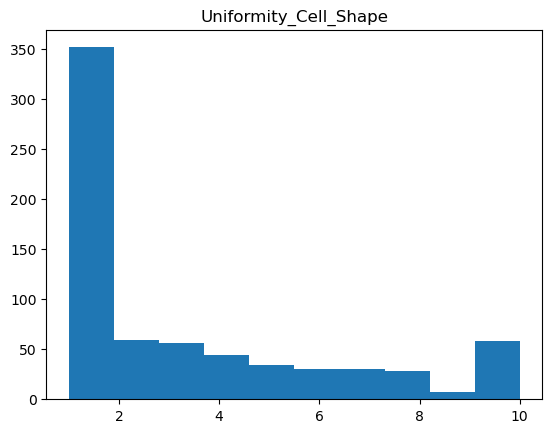

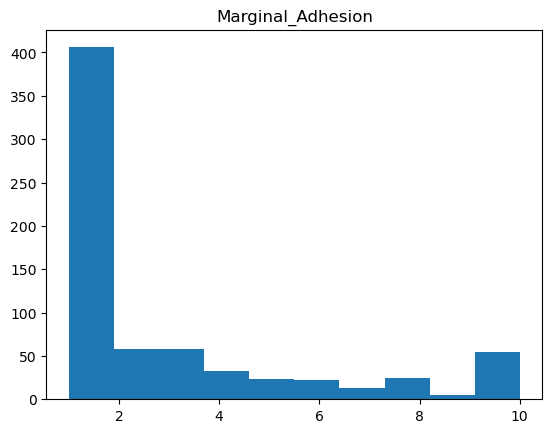

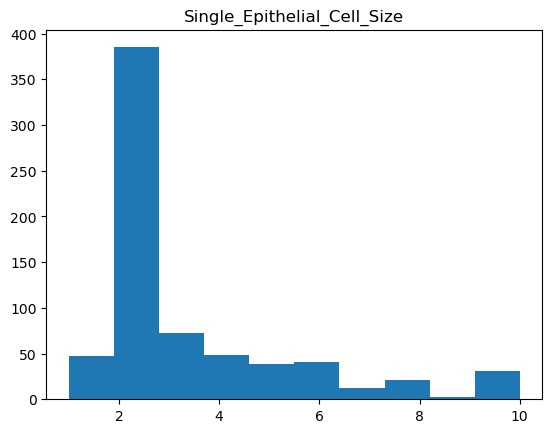

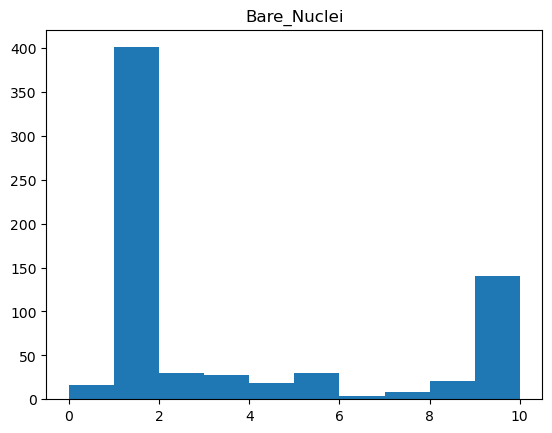

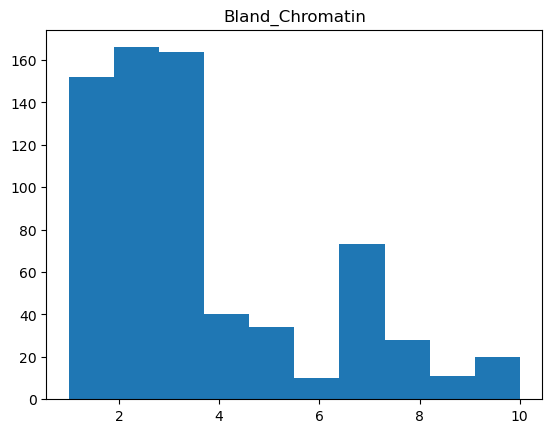

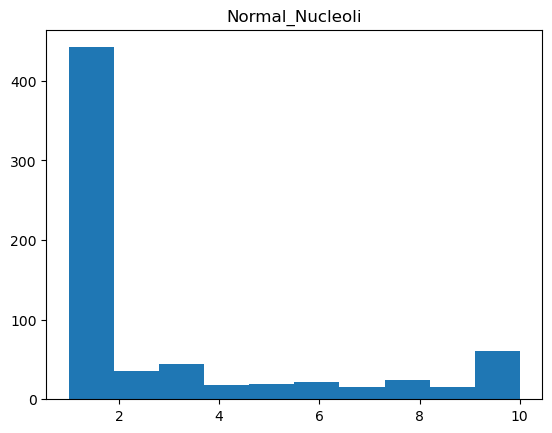

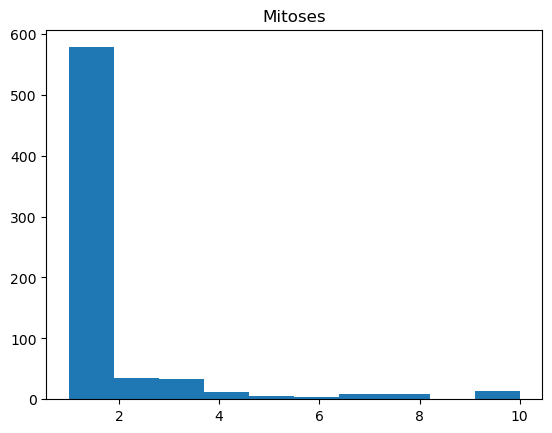

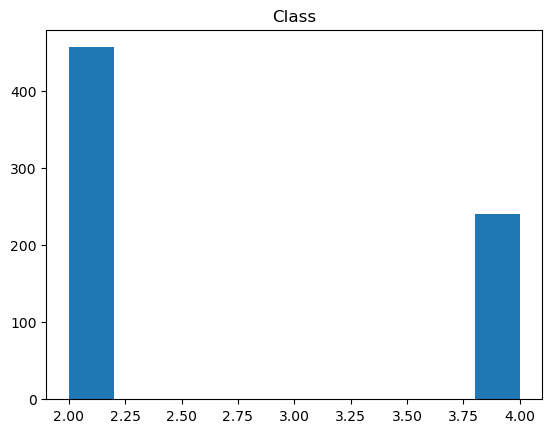

In [87]:
for column in df.columns:
    plt.title(column)
    plt.hist(x=df[column])
    plt.show()

In [88]:
df.corr()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.589709,0.558511,0.536176,0.350176,0.716509
Uniformity_Cell_Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.684355,0.755824,0.722699,0.458548,0.817772
Uniformity_Cell_Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.704318,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.665519,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.582689,0.616108,0.628704,0.478975,0.682618
Bare_Nuclei,0.589709,0.684355,0.704318,0.665519,0.582689,1.000000,0.671606,0.571802,0.342603,0.817526
Bland_Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.671606,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.571802,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.342603,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.817526,0.756732,0.712067,0.423008,1.000000


<Axes: >

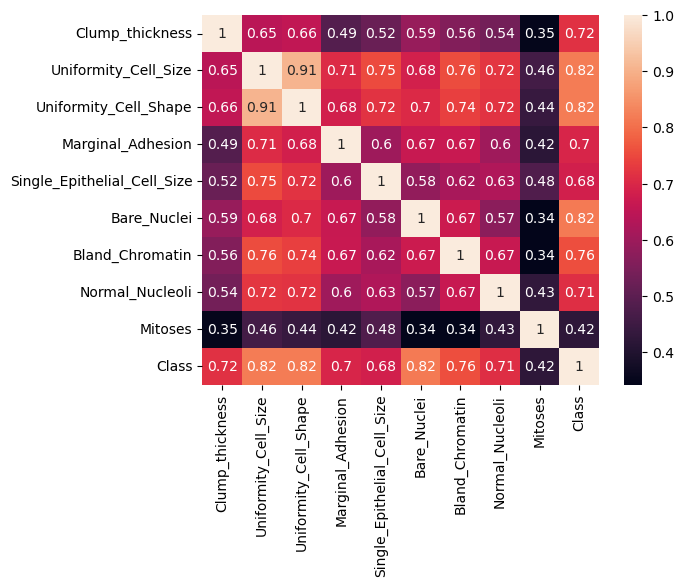

In [89]:
sns.heatmap(data=df.corr(),annot=True)

In [90]:
df["Class"]=df["Class"].map({2:0,4:1})

In [154]:
features=df[['Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]
target=df[[ 'Class']]

# KNN WITH  K=3

In [155]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.3,random_state=42)

In [156]:
def scaling(df):
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

In [157]:
x_train=scaling(x_train)
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
655,0.444444,0.000000,0.000000,0.000000,0.111111,0.1,0.111111,0.000000,0.0
522,0.666667,0.444444,0.555556,1.000000,0.333333,1.0,0.444444,0.222222,0.0
419,0.222222,0.111111,0.111111,0.222222,0.111111,0.3,0.222222,0.000000,0.0
442,0.000000,0.000000,0.000000,0.000000,0.111111,0.2,0.000000,0.000000,0.0
620,0.555556,0.222222,0.222222,0.222222,0.222222,0.2,0.555556,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
71,0.000000,0.222222,0.222222,0.111111,0.111111,0.1,0.666667,0.111111,0.0
106,0.000000,0.555556,0.777778,1.000000,0.777778,1.0,0.444444,0.666667,0.0
270,0.444444,0.000000,0.000000,0.000000,0.111111,0.1,0.222222,0.000000,0.0
435,1.000000,1.000000,1.000000,0.000000,0.555556,0.1,0.111111,0.777778,0.0


In [158]:
x_test=scaling(x_test)
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
158,0.888889,0.888889,1.000000,0.222222,0.555556,1.0,0.666667,1.000000,0.555556
499,0.555556,0.000000,0.000000,0.000000,0.111111,0.1,0.222222,0.000000,0.000000
396,0.333333,0.000000,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.000000
155,0.000000,0.111111,0.111111,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
321,0.222222,0.000000,0.000000,0.000000,0.111111,0.1,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
198,0.222222,0.000000,0.000000,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
351,0.222222,0.333333,0.444444,0.222222,0.666667,0.3,0.333333,0.555556,0.000000
494,0.222222,0.000000,0.000000,0.000000,0.000000,0.1,0.111111,0.000000,0.000000
146,0.000000,0.000000,0.000000,0.000000,0.222222,0.2,0.111111,0.000000,0.000000


In [159]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [160]:
KNN.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [161]:
y_pred=KNN.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [162]:
accuracy_3=accuracy_score(y_test,y_pred)
precision_3=precision_score(y_test,y_pred)
f1_3=f1_score(y_test,y_pred)
recall_3=recall_score(y_test,y_pred)
print("accuracy is",accuracy_3)
print("precision is",precision_3)
print("f1 is",f1_3)
print("recall is",recall_3)

accuracy is 0.9693251533742331
precision is 0.9597701149425287
f1 is 0.9570200573065902
recall is 0.9542857142857143


In [163]:
Y_pred=KNN.predict(x_train)
Train_set_accuracy=accuracy_score(y_train,Y_pred)
Train_set_accuracy

0.9665071770334929

<Axes: >

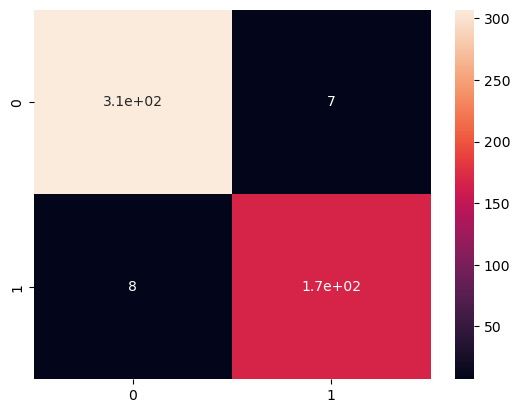

In [164]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       314
           1       0.96      0.95      0.96       175

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489



0.9659963603275705


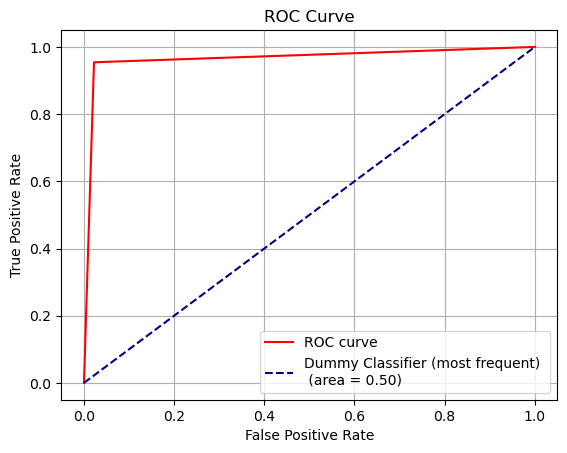

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red',
         label='ROC curve')
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [167]:
from sklearn.model_selection import KFold,cross_val_score

In [168]:
kfold=KFold(n_splits=10,shuffle=True,random_state=5)
accuracy=cross_val_score(KNN,fv,tv,cv=kfold,scoring='accuracy')
precision=cross_val_score(KNN,fv,tv,cv=kfold,scoring='precision_macro')
f1=cross_val_score(KNN,fv,tv,cv=kfold,scoring='f1_macro')
recall=cross_val_score(KNN,fv,tv,cv=kfold,scoring='recall_macro')
results = []
for i in range(10):
    results.append([i+1, accuracy[i], precision[i], f1[i], recall[i]])
kfold_results = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'F1 Score', 'Recall'])
kfold_results

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

,Fold,Accuracy,Precision,F1 Score,Recall
0,1,0.957143,0.948889,0.952904,0.957428
1,2,1.000000,1.000000,1.000000,1.000000
2,3,0.957143,0.957428,0.952904,0.948889
3,4,0.971429,0.969406,0.969406,0.969406
4,5,0.971429,0.966856,0.966856,0.966856
5,6,0.957143,0.937500,0.950877,0.969388
6,7,0.928571,0.927518,0.928205,0.929276
7,8,0.957143,0.951613,0.956058,0.964286
8,9,0.985507,0.990566,0.980087,0.970588
9,10,0.985507,0.989130,0.983867,0.979167


In [169]:
kfold_results.iloc[:,1:5].mean()

Accuracy     0.967101
Precision    0.963891
F1 Score     0.964116
Recall       0.965528
dtype: float64

# KNN WITH DIFFERENT K VALUES

In [170]:
from tabulate import tabulate

In [171]:
neighbours = [3, 4, 5, 6, 7, 8, 9]
train_size = [0.75, 0.70, 0.80]
accuracy = {}
precision = {}
f1 = {}
recall = {}

def KNN(neighbours, train_size, feature_vectors, target_variable):
    results = []

    for k in neighbours:
        for i in train_size:
            x_train, x_test, y_train, y_test = train_test_split(fv, tv, train_size=i, random_state=5)
            x_train = scaling(x_train)
            x_test = scaling(x_test)
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(x_train, y_train)
            y_pred = KNN.predict(x_test)
            accuracy[k] = accuracy_score(y_test, y_pred)
            precision[k] = precision_score(y_test, y_pred)
            f1[k] = f1_score(y_test, y_pred)
            recall[k] = recall_score(y_test, y_pred)
            results.append([k, i, accuracy[k], precision[k], f1[k], recall[k]])

    headers = ["K", "Train Size", "Accuracy", "Precision", "F1 Score", "Recall"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

KNN(neighbours, train_size, fv, tv)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

+-----+--------------+------------+-------------+------------+----------+
|   K |   Train Size |   Accuracy |   Precision |   F1 Score |   Recall |
+=====+==============+============+=============+============+==========+
|   3 |         0.75 |   0.971429 |    0.966102 |   0.957983 | 0.95     |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.7  |   0.971429 |    0.957746 |   0.957746 | 0.957746 |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.8  |   0.978571 |    0.957447 |   0.967742 | 0.978261 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.75 |   0.977143 |    0.982759 |   0.966102 | 0.95     |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.7  |   0.97619  |    0.971429 |   0.964539 | 0.957746 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.8  |   0.985714 |   

# WITHOUT USING BUILT-IN FUNCTIONS

In [172]:
def euclidist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [173]:
X=df.iloc[:,:-1]
X

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1
694,2,1,1,1,2,1,1,1,1
695,5,10,10,3,7,3,8,10,2
696,4,8,6,4,3,4,10,6,1


In [174]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: Class, Length: 698, dtype: int64

In [175]:
x_train=X.iloc[:int(X.shape[0]*.7),:]
x_test=X.iloc[int(X.shape[0]*.7):,:]
y_train=y.iloc[:int(y.shape[0]*.7)]
y_test=y.iloc[int(y.shape[0]*.7):]

In [176]:
def Knn(x_train,y_train,x_test,k):
    y_pred=[]
    for i in range(x_test.shape[0]):
        class_0=0
        class_1=0
        dist=[]
        for j in range(x_train.shape[0]):
            d=euclidist(x_test.iloc[i],x_train.iloc[j])
            dist.append([d,y_train.iloc[j]])
        dist=sorted(dist)
        dist=dist[:k]
        for i in range(len(dist)):
            if(dist[i][1]==0):
                class_0+=1
            else:
                class_1+=1
        if(class_0>class_1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [177]:
y_pred=Knn(x_train,y_train,x_test,3)
y_pred

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [178]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 0.9809523809523809
precision is 0.9777777777777777
f1 is 0.9565217391304347
recall is 0.9361702127659575


<Axes: >

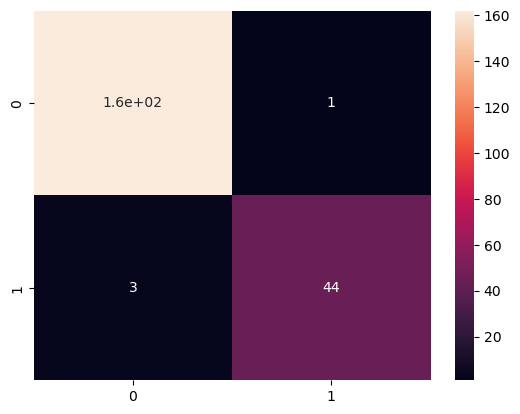

In [179]:
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True)